# Phenotypic phase plane

In [1]:
# import all the tools necessary for PPP analysis 
import cobra
import cameo
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from cobra.io import read_sbml_model
from cobra.flux_analysis import production_envelope
from cameo import phenotypic_phase_plane
from cameo.visualization.plotting.with_plotly import PlotlyPlotter
import matplotlib.pyplot as plt
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

In [2]:
#Our model model
%run Scaffold_Y_lipo.ipynb

In [3]:
#Define our exchange reactions
glc_exchange = model.reactions.EX_glc__D_e #D_Glucose
gly_exchange = model.reactions.EX_glyc_e #Glycerol
xyl_exchange = model.reactions.EX_xyl__D_e #Xylose
o2_exchange = model.reactions.EX_o2_e #Oxygen
growth = model.reactions.BIOMASS_SC4_bal #growth

medium = model.medium

#Amping glycerol levels to 1000.0
model.reactions.EX_glyc_e.bounds = -1000, 0
model.reactions.EX_xyl__D_e.bounds = -1, 0
model.reactions.EX_glc__D_e.bounds = -1,0
model.reactions.EX_o2_e.bounds = -999999,0
model.medium

{'EX_nh4_e': 999999.0,
 'EX_o2_e': 999999,
 'EX_pi_e': 999999.0,
 'EX_so4_e': 999999.0,
 'EX_xyl__D_e': 1,
 'EX_glyc_e': 1000,
 'EX_glc__D_e': 1,
 'EX_h2o_e': 999999.0}

In [4]:
#Checking which oxygen concentration will give the highest theoretical growth
medium_oxygen_ex = model.reactions.get_by_id('EX_o2_e') 
medium = model.medium
with model: 
    growth_rate = model.optimize().objective_value
    print("With an oxygen concentration of {}:".format(medium[medium_oxygen_ex.id]),"The maximum theoretical growth is", growth_rate,"h^-1")

    #Will try to change the oxygen levels to see is it changes anything
    medium[medium_oxygen_ex.id] = 750 
    model.medium = medium

    growth_rate = model.optimize().objective_value
    print("With an oxygen concentration of {}:".format(medium[medium_oxygen_ex.id]),"The maximum theoretical growth is", growth_rate,"h^-1")

     #Will try to change the oxygen levels to see is it changes anything
    medium[medium_oxygen_ex.id] = 500
    model.medium = medium

    growth_rate = model.optimize().objective_value
    print("With an oxygen concentration of {}:".format(medium[medium_oxygen_ex.id]),"The maximum theoretical growth is", growth_rate,"h^-1")

    #Will try to change the oxygen levels to see is it changes anything
    medium[medium_oxygen_ex.id] = 250
    model.medium = medium

    growth_rate = model.optimize().objective_value
    print("With an oxygen concentration of {}:".format(medium[medium_oxygen_ex.id]),"The maximum theoretical growth is", growth_rate,"h^-1")

     #Will try to change the oxygen levels to see is it changes anything
    medium[medium_oxygen_ex.id] = 50
    model.medium = medium

    growth_rate = model.optimize().objective_value
    print("With an oxygen concentration of {}:".format(medium[medium_oxygen_ex.id]),"The maximum theoretical growth is", growth_rate,"h^-1")


With an oxygen concentration of 999999: The maximum theoretical growth is 54.259591493383574 h^-1
With an oxygen concentration of 750: The maximum theoretical growth is 31.156953299700962 h^-1
With an oxygen concentration of 500: The maximum theoretical growth is 22.065841146980055 h^-1
With an oxygen concentration of 250: The maximum theoretical growth is 11.055373292252773 h^-1
With an oxygen concentration of 50: The maximum theoretical growth is 2.246999008470672 h^-1


In [5]:
#Analysis on growth with glycerol
ppp_biomass_on_glycerol = production_envelope(model,
                    reactions=[gly_exchange],
                    objective=growth)
ppp_biomass_on_glycerol

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glyc_e
0,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,1.474752e-14,NaN,54.259591,11.329194,NaN,-1000.000000
1,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.000000e+00,NaN,51.413550,11.329038,NaN,-947.368421
2,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.000000e+00,NaN,48.567509,11.328864,NaN,-894.736842
3,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.000000e+00,NaN,45.721469,11.328669,NaN,-842.105263
4,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.000000e+00,NaN,42.875428,11.328448,NaN,-789.473684
5,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.000000e+00,NaN,40.029387,11.328195,NaN,-736.842105
6,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.000000e+00,NaN,37.183346,11.327903,NaN,-684.210526
7,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.000000e+00,NaN,34.337305,11.327564,NaN,-631.578947
8,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.000000e+00,NaN,31.491264,11.327162,NaN,-578.947368
9,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.000000e+00,NaN,28.645223,11.326682,NaN,-526.315789


<Axes: xlabel='Glycerol uptake [mmol/g DW/h]', ylabel='Biomass objective [1/h]'>

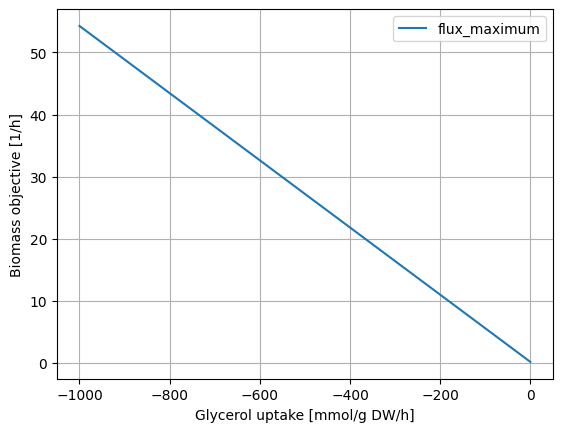

In [6]:
#Plot the ppp_biomass_on_glycerol
ppp_biomass_on_glycerol.plot(x='EX_glyc_e', y='flux_maximum', xlabel="Glycerol uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]", grid = True)

In [7]:
#Analysing EPA production with glycerol
ppp_EPA_on_glycerol = production_envelope(model,
                    reactions=[gly_exchange],
                    objective=model.reactions.DM_Eicosapentaenoic_Acid)
ppp_EPA_on_glycerol

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glyc_e
0,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,85.910224,0.570642,0.280198,-1000.000000
1,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,81.403946,0.570634,0.280195,-947.368421
2,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,76.897668,0.570625,0.280192,-894.736842
3,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,72.391390,0.570614,0.280188,-842.105263
4,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,67.885112,0.570602,0.280184,-789.473684
5,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,63.378834,0.570588,0.280179,-736.842105
6,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,58.872555,0.570572,0.280174,-684.210526
7,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,54.366277,0.570554,0.280167,-631.578947
8,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,49.859999,0.570532,0.280160,-578.947368
9,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,45.353721,0.570506,0.280151,-526.315789


<Axes: xlabel='Glycerol uptake [mmol/g DW/h]', ylabel='EPA objective [1/h]'>

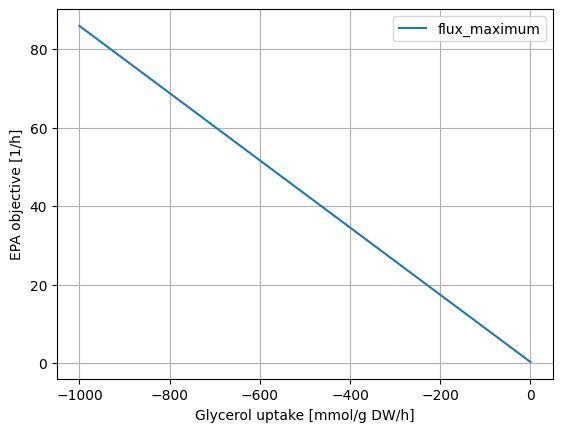

In [8]:
ppp_EPA_on_glycerol.plot(x='EX_glyc_e', y='flux_maximum', xlabel="Glycerol uptake [mmol/g DW/h]", ylabel="EPA objective [1/h]", grid = True)

In [9]:
#Analysis on growth with oxygen
ppp_oxy = production_envelope(model,
                    reactions=[o2_exchange],
                    objective=growth)
ppp_oxy

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_o2_e
0,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,NaN,0.000000,5.276329e-13,NaN,-3511.000000
1,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,NaN,5.042964,1.052951e+00,NaN,-3326.210526
2,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,NaN,10.085928,2.105903e+00,NaN,-3141.421053
3,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,NaN,15.128891,3.158854e+00,NaN,-2956.631579
4,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,NaN,20.171855,4.211806e+00,NaN,-2771.842105
5,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,NaN,25.214819,5.264757e+00,NaN,-2587.052632
6,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,NaN,30.257783,6.317708e+00,NaN,-2402.263158
7,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,NaN,35.300747,7.370660e+00,NaN,-2217.473684
8,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,NaN,40.343710,8.423611e+00,NaN,-2032.684211
9,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,NaN,45.386674,9.476563e+00,NaN,-1847.894737


<Axes: xlabel='Oxygen uptake [mmol/g DW/h]', ylabel='biomass objective [1/h]'>

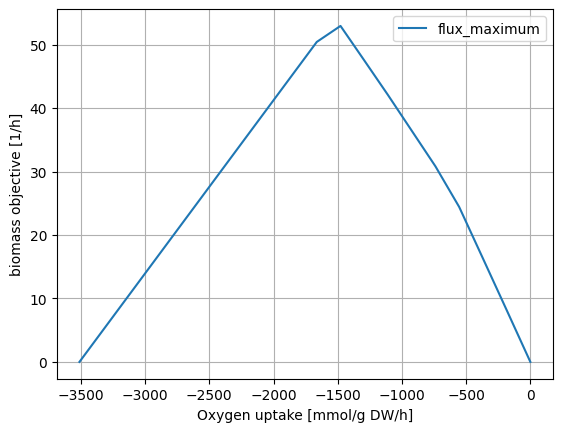

In [10]:
ppp_oxy.plot(x='EX_o2_e', y='flux_maximum', xlabel="Oxygen uptake [mmol/g DW/h]", ylabel="biomass objective [1/h]", grid = True)

In [11]:
#Analysis on EPA production with oxygen
ppp_EPA_vs_oxy = production_envelope(model,
                    reactions=[o2_exchange],
                    objective=model.reactions.DM_Eicosapentaenoic_Acid)
ppp_EPA_vs_oxy

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_o2_e
0,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,0.000000,1.256365e-14,6.169028e-15,-3511.000000
1,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,7.542427,5.009915e-02,2.459978e-02,-3326.210526
2,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,15.084855,1.001983e-01,4.919955e-02,-3141.421053
3,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,22.627282,1.502975e-01,7.379933e-02,-2956.631579
4,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,30.169710,2.003966e-01,9.839911e-02,-2771.842105
5,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,37.712137,2.504958e-01,1.229989e-01,-2587.052632
6,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,45.254565,3.005949e-01,1.475987e-01,-2402.263158
7,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,52.796992,3.506941e-01,1.721984e-01,-2217.473684
8,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,60.339420,4.007932e-01,1.967982e-01,-2032.684211
9,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,67.881847,4.508924e-01,2.213980e-01,-1847.894737


<Axes: xlabel='Oxygen uptake [mmol/g DW/h]', ylabel='EPA objective [1/h]'>

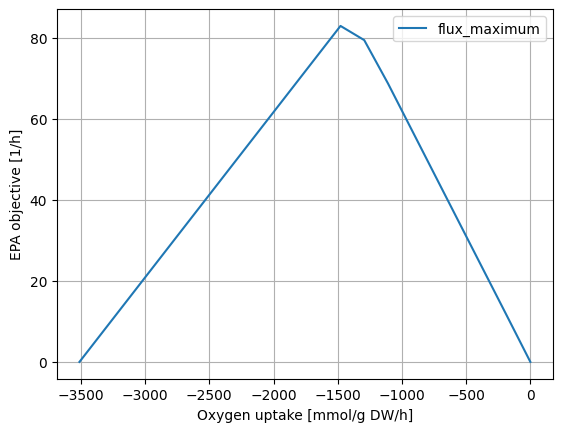

In [12]:
ppp_EPA_vs_oxy.plot(x='EX_o2_e', y='flux_maximum', xlabel="Oxygen uptake [mmol/g DW/h]", ylabel="EPA objective [1/h]", grid = True)

In [13]:
#Changing medium to have xylose instead of glycerol
model.reactions.EX_xyl__D_e.bounds = -1000, 0
model.reactions.EX_glc__D_e.bounds = -1,0
model.reactions.EX_glyc_e.bounds = -1,0 
model.medium

{'EX_nh4_e': 999999.0,
 'EX_o2_e': 999999,
 'EX_pi_e': 999999.0,
 'EX_so4_e': 999999.0,
 'EX_xyl__D_e': 1000,
 'EX_glyc_e': 1,
 'EX_glc__D_e': 1,
 'EX_h2o_e': 999999.0}

In [14]:
#Biomass on xylose 
ppp_biomass_on_xylose = production_envelope(model,
                    reactions=[xyl_exchange],
                    objective=growth)
ppp_biomass_on_xylose

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_xyl__D_e
0,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,2.283596e-14,NaN,79.701916,10.003477,NaN,-1000.000000
1,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.000000e+00,NaN,75.515135,10.003546,NaN,-947.368421
2,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.000000e+00,NaN,71.328353,10.003622,NaN,-894.736842
3,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.000000e+00,NaN,67.141572,10.003709,NaN,-842.105263
4,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.000000e+00,NaN,62.954791,10.003807,NaN,-789.473684
5,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.000000e+00,NaN,58.768009,10.003919,NaN,-736.842105
6,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.000000e+00,NaN,54.581228,10.004048,NaN,-684.210526
7,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.000000e+00,NaN,50.394447,10.004198,NaN,-631.578947
8,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.000000e+00,NaN,46.207665,10.004376,NaN,-578.947368
9,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.000000e+00,NaN,42.020884,10.004589,NaN,-526.315789


<Axes: xlabel='Xylose uptake [mmol/g DW/h]', ylabel='Biomass objective [1/h]'>

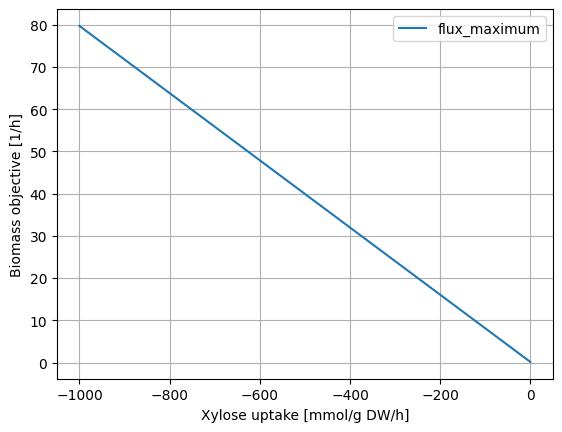

In [15]:
#Plot biomass on xylose
ppp_biomass_on_xylose.plot(x='EX_xyl__D_e', y='flux_maximum', xlabel="Xylose uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]", grid = True)

In [16]:
#EPA production on xylose
ppp_EPA_on_xylose = production_envelope(model,
                    reactions=[xyl_exchange],
                    objective=model.reactions.DM_Eicosapentaenoic_Acid)
ppp_EPA_on_xylose

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_xyl__D_e
0,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,126.512081,0.505139,0.253561,-1000.000000
1,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,119.866472,0.505143,0.253563,-947.368421
2,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,113.220864,0.505148,0.253565,-894.736842
3,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,106.575255,0.505153,0.253568,-842.105263
4,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,99.929647,0.505158,0.253570,-789.473684
5,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,93.284038,0.505165,0.253573,-736.842105
6,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,86.638430,0.505173,0.253577,-684.210526
7,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,79.992821,0.505181,0.253581,-631.578947
8,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,73.347213,0.505192,0.253585,-578.947368
9,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,66.701604,0.505204,0.253591,-526.315789


<Axes: xlabel='Xylose uptake [mmol/g DW/h]', ylabel='EPA objective [1/h]'>

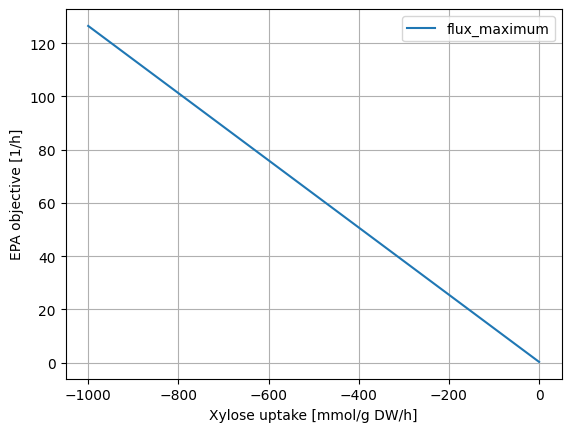

In [17]:
#Plot EPA on xylose
ppp_EPA_on_xylose.plot(x='EX_xyl__D_e', y='flux_maximum', xlabel="Xylose uptake [mmol/g DW/h]", ylabel="EPA objective [1/h]", grid = True)

In [18]:
#Changing medium to glucose instead of xylose
model.reactions.EX_xyl__D_e.bounds = -1, 0
model.reactions.EX_glc__D_e.bounds = -1000,0
model.reactions.EX_glyc_e.bounds = -1,0 
model.medium

{'EX_nh4_e': 999999.0,
 'EX_o2_e': 999999,
 'EX_pi_e': 999999.0,
 'EX_so4_e': 999999.0,
 'EX_xyl__D_e': 1,
 'EX_glyc_e': 1,
 'EX_glc__D_e': 1000,
 'EX_h2o_e': 999999.0}

In [19]:
#Biomass on glucose
ppp_biomass_on_glucose = production_envelope(model,
                    reactions=[glc_exchange],
                    objective=growth)
ppp_biomass_on_glucose

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e
0,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,4.421657e-15,NaN,97.459397,10.198282,NaN,-1000.000000
1,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.000000e+00,NaN,92.337114,10.198319,NaN,-947.368421
2,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.000000e+00,NaN,87.214831,10.198359,NaN,-894.736842
3,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.000000e+00,NaN,82.092548,10.198405,NaN,-842.105263
4,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.000000e+00,NaN,76.970265,10.198457,NaN,-789.473684
5,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.000000e+00,NaN,71.847982,10.198516,NaN,-736.842105
6,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.000000e+00,NaN,66.725699,10.198584,NaN,-684.210526
7,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.000000e+00,NaN,61.603416,10.198663,NaN,-631.578947
8,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.000000e+00,NaN,56.481133,10.198757,NaN,-578.947368
9,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.000000e+00,NaN,51.358850,10.198870,NaN,-526.315789


<Axes: xlabel='Glucose uptake [mmol/g DW/h]', ylabel='Biomass objective [1/h]'>

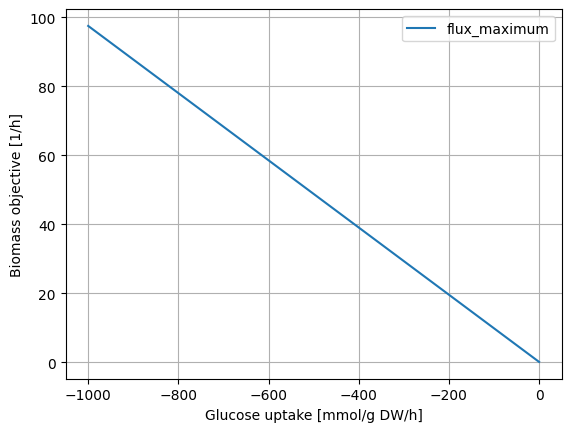

In [20]:
#Plot biomass on glucose
ppp_biomass_on_glucose.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]", grid = True)

In [21]:
#EPA production on glucose
ppp_EPA_on_glucose = production_envelope(model,
                    reactions=[glc_exchange],
                    objective=model.reactions.DM_Eicosapentaenoic_Acid)
ppp_EPA_on_glucose

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e
0,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,159.215121,0.530010,0.266047,-1000.000000
1,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,150.846577,0.530011,0.266046,-947.368421
2,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,142.478033,0.530011,0.266046,-894.736842
3,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,134.109488,0.530011,0.266046,-842.105263
4,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,125.740944,0.530011,0.266046,-789.473684
5,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,117.372400,0.530011,0.266046,-736.842105
6,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,109.003856,0.530012,0.266046,-684.210526
7,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,100.635312,0.530012,0.266046,-631.578947
8,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,92.266768,0.530012,0.266045,-578.947368
9,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,83.898224,0.530013,0.266045,-526.315789


<Axes: xlabel='Glucose uptake [mmol/g DW/h]', ylabel='EPA objective [1/h]'>

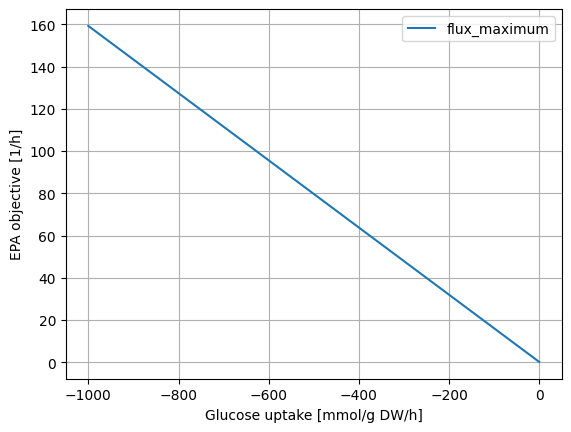

In [22]:
#plot EPA production on glucsoe
ppp_EPA_on_glucose.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", ylabel="EPA objective [1/h]", grid = True)

<Axes: title={'center': 'EPA production on glucose'}, xlabel='Glucose uptake [mmol/g DW/h]', ylabel='EPA objective [1/h]'>

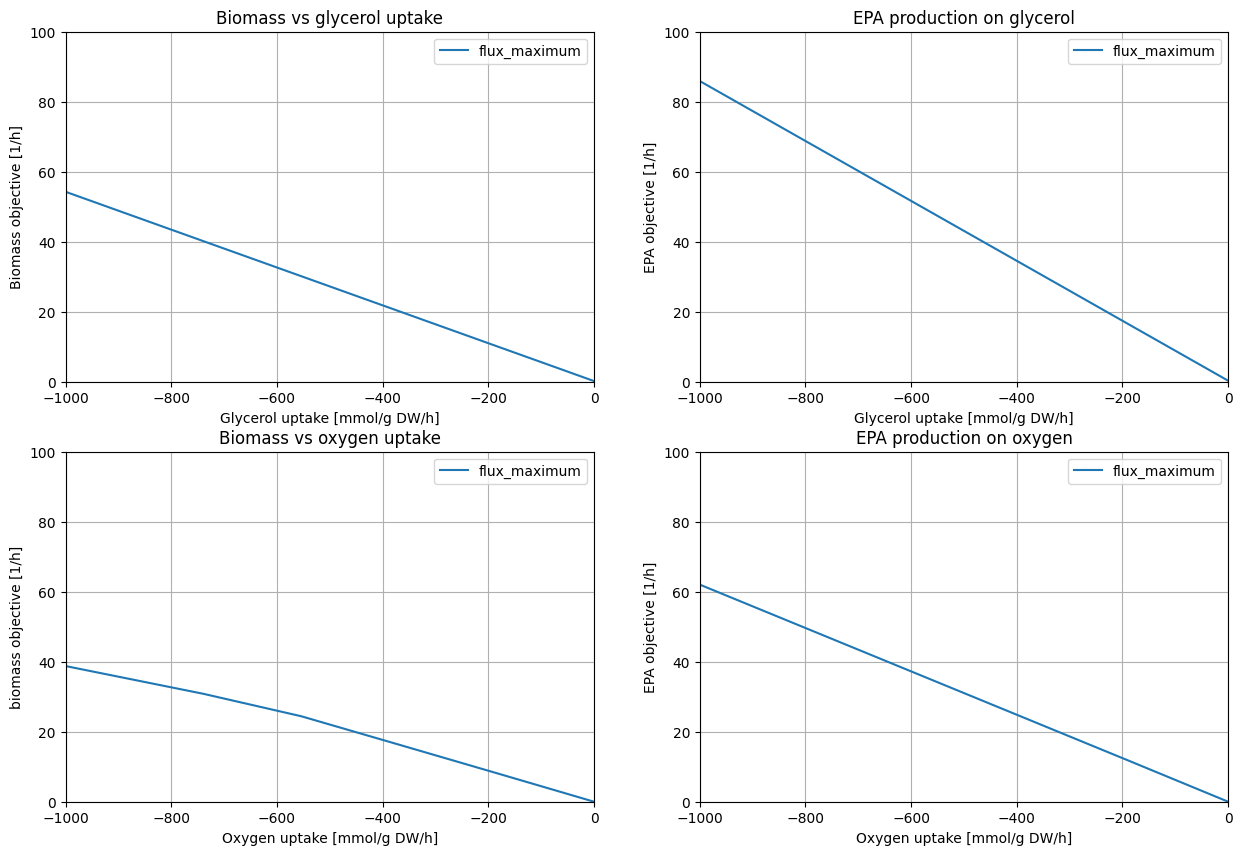

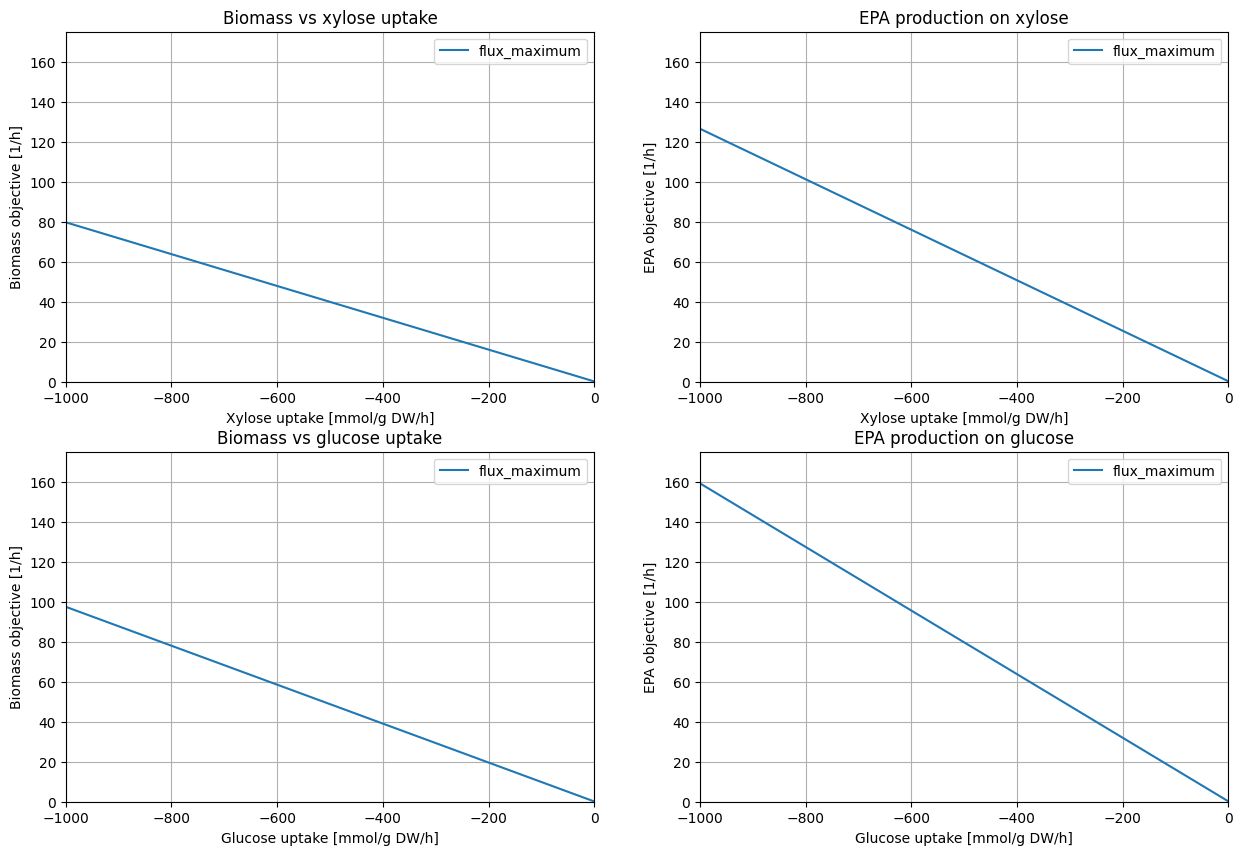

In [23]:
#Plotting Glycerol and oxygen biomass and EPA production
fig,axs = plt.subplots(2,2,figsize=(15,10),subplot_kw={'xlim':(-1000,0),'ylim':(0,100)})

ppp_biomass_on_glycerol.plot(x='EX_glyc_e', y='flux_maximum', xlabel="Glycerol uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]", grid = True, ax=axs[0][0], title="Biomass vs glycerol uptake")

ppp_EPA_on_glycerol.plot(x='EX_glyc_e', y='flux_maximum', xlabel="Glycerol uptake [mmol/g DW/h]", ylabel="EPA objective [1/h]", grid = True, ax=axs[0][1], title="EPA production on glycerol")

ppp_oxy.plot(x='EX_o2_e', y='flux_maximum', xlabel="Oxygen uptake [mmol/g DW/h]", ylabel="biomass objective [1/h]", grid = True, ax=axs[1][0], title="Biomass vs oxygen uptake")

ppp_EPA_vs_oxy.plot(x='EX_o2_e', y='flux_maximum', xlabel="Oxygen uptake [mmol/g DW/h]", ylabel="EPA objective [1/h]", grid = True, ax=axs[1][1], title="EPA production on oxygen")

#ppp_EPA_on_xylose.plot(x='EX_xyl__D_e', y='flux_maximum', xlabel="Xylose uptake [mmol/g DW/h]", ylabel="EPA objective [1/h]", grid = True, ax=axs[1][1], title="Biomass vs xylose uptake)

#ppp_biomass_on_xylose.plot(x='EX_xyl__D_e', y='flux_maximum', xlabel="Xylose uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]", grid = True, ax=axs[0][2], title="Biomass vs xylose uptake")

#ppp_EPA_on_xylose.plot(x='EX_xyl__D_e', y='flux_maximum', xlabel="Xylose uptake [mmol/g DW/h]", ylabel="EPA objective [1/h]", grid = True, ax=axs[1][2], title="EPA production on xylose")

#ppp_biomass_on_glucose.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]", grid = True, ax=axs[2][0], title="EPA production on glucose")

#ppp_EPA_on_glucose.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", ylabel="EPA objective [1/h]", grid = True, ax=axs[2][1], title="EPA production on glucose")

#Plotting xylose and glucose biomass and EPA production
fig,axs = plt.subplots(2,2,figsize=(15,10),subplot_kw={'xlim':(-1000,0),'ylim':(0,175)})

ppp_biomass_on_xylose.plot(x='EX_xyl__D_e', y='flux_maximum', xlabel="Xylose uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]", grid = True, ax=axs[0][0], title="Biomass vs xylose uptake")

ppp_EPA_on_xylose.plot(x='EX_xyl__D_e', y='flux_maximum', xlabel="Xylose uptake [mmol/g DW/h]", ylabel="EPA objective [1/h]", grid = True, ax=axs[0][1], title="EPA production on xylose")

ppp_biomass_on_glucose.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]", grid = True, ax=axs[1][0], title="Biomass vs glucose uptake")

ppp_EPA_on_glucose.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", ylabel="EPA objective [1/h]", grid = True, ax=axs[1][1], title="EPA production on glucose")


Will now do the same analysis, but with 0 oxygen present. 

In [24]:
model.medium

{'EX_nh4_e': 999999.0,
 'EX_o2_e': 999999,
 'EX_pi_e': 999999.0,
 'EX_so4_e': 999999.0,
 'EX_xyl__D_e': 1,
 'EX_glyc_e': 1,
 'EX_glc__D_e': 1000,
 'EX_h2o_e': 999999.0}

In [25]:
glc_exchange = model.reactions.EX_glc__D_e #D_Glucose
gly_exchange = model.reactions.EX_glyc_e #Glycerol
xyl_exchange = model.reactions.EX_xyl__D_e #Xylose
o2_exchange = model.reactions.EX_o2_e #Oxygen
growth = model.reactions.BIOMASS_SC4_bal #growth

medium = model.medium

model.reactions.EX_glyc_e.bounds = -1000, 0
model.reactions.EX_xyl__D_e.bounds = -1, 0
model.reactions.EX_glc__D_e.bounds = -1,0
model.reactions.EX_o2_e.bounds = -1,0
model.medium

{'EX_nh4_e': 999999.0,
 'EX_o2_e': 1,
 'EX_pi_e': 999999.0,
 'EX_so4_e': 999999.0,
 'EX_xyl__D_e': 1,
 'EX_glyc_e': 1000,
 'EX_glc__D_e': 1,
 'EX_h2o_e': 999999.0}

In [26]:
ppp_biomass_no_oxy = production_envelope(model,
                    reactions=[gly_exchange],
                    objective=growth)
ppp_biomass_no_oxy

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glyc_e
0,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,NaN,0.000000,1.842672e-14,NaN,-7.666667
1,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,NaN,0.017221,3.301759e-01,NaN,-7.263158
2,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,NaN,0.021423,4.264948e-01,NaN,-6.859649
3,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,NaN,0.025625,5.304924e-01,NaN,-6.456140
4,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,NaN,0.029828,6.431252e-01,NaN,-6.052632
5,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,NaN,0.034030,7.655153e-01,NaN,-5.649123
6,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,NaN,0.038232,8.989879e-01,NaN,-5.245614
7,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,NaN,0.042435,1.045120e+00,NaN,-4.842105
8,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,NaN,0.046637,1.205802e+00,NaN,-4.438596
9,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,NaN,0.050839,1.383320e+00,NaN,-4.035088


<Axes: xlabel='Glycerol uptake [mmol/g DW/h]', ylabel='Biomass objective [1/h]'>

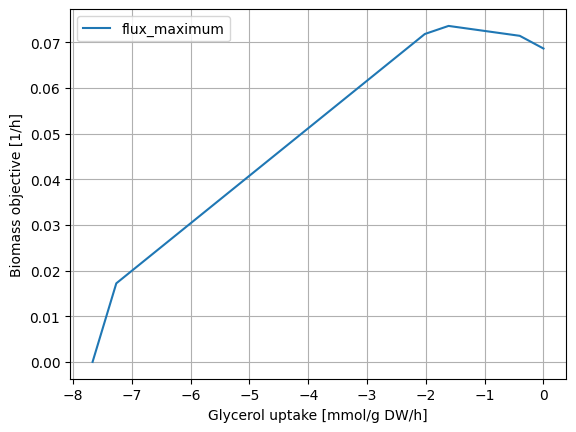

In [27]:
ppp_biomass_no_oxy.plot(x='EX_glyc_e', y='flux_maximum', xlabel="Glycerol uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]", grid = True)

In [28]:
ppp_EPA_glyc_no_oxy = production_envelope(model,
                    reactions=[gly_exchange],
                    objective=model.reactions.DM_Eicosapentaenoic_Acid)
ppp_EPA_glyc_no_oxy

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glyc_e
0,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,0.000000,0.000000,0.000000,-7.666667
1,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,0.011985,0.007311,0.003616,-7.263158
2,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,0.023971,0.015182,0.007511,-6.859649
3,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,0.028806,0.018971,0.009389,-6.456140
4,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,0.033530,0.022999,0.011386,-6.052632
5,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,0.038254,0.027376,0.013558,-5.649123
6,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,0.042978,0.032149,0.015928,-5.245614
7,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,0.047702,0.037375,0.018525,-4.842105
8,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,0.052426,0.043121,0.021383,-4.438596
9,"EX_xyl__D_e, EX_glyc_e, EX_glc__D_e",0.0,0.0,0.0,0.057150,0.049469,0.024544,-4.035088


<Axes: xlabel='Glycerol uptake [mmol/g DW/h]', ylabel='EPA objective [1/h]'>

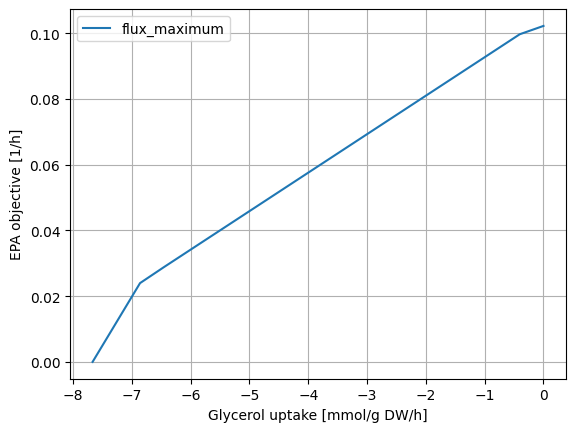

In [29]:
ppp_EPA_glyc_no_oxy.plot(x='EX_glyc_e', y='flux_maximum', xlabel="Glycerol uptake [mmol/g DW/h]", ylabel="EPA objective [1/h]", grid = True)

In [30]:
medium['EX_xyl__D_e'] = 700
model.reactions.EX_glyc_e.bounds = -1, 0
model.reactions.EX_xyl__D_e.bounds = -1000, 0
model.reactions.EX_glc__D_e.bounds = -1,0
model.reactions.EX_o2_e.bounds = -1,0
model.medium

{'EX_nh4_e': 999999.0,
 'EX_o2_e': 1,
 'EX_pi_e': 999999.0,
 'EX_so4_e': 999999.0,
 'EX_xyl__D_e': 1000,
 'EX_glyc_e': 1,
 'EX_glc__D_e': 1,
 'EX_h2o_e': 999999.0}

In [31]:
ppp_biomass_xyl_no_oxy = production_envelope(model,
                    reactions=[xyl_exchange],
                    objective=growth)
ppp_biomass_xyl_no_oxy

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_xyl__D_e
0,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,NaN,6.973187,0.875737,NaN,-1000.000000
1,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,NaN,6.613901,0.876703,NaN,-947.368421
2,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,NaN,6.254616,0.877782,NaN,-894.736842
3,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,NaN,5.895331,0.878995,NaN,-842.105263
4,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,NaN,5.536046,0.880371,NaN,-789.473684
5,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,NaN,5.176761,0.881942,NaN,-736.842105
6,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,NaN,4.817475,0.883755,NaN,-684.210526
7,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,NaN,4.458190,0.885870,NaN,-631.578947
8,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,NaN,4.098905,0.888368,NaN,-578.947368
9,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,NaN,3.735761,0.890445,NaN,-526.315789


<Axes: xlabel='Xylose uptake [mmol/g DW/h]', ylabel='Biomass objective [1/h]'>

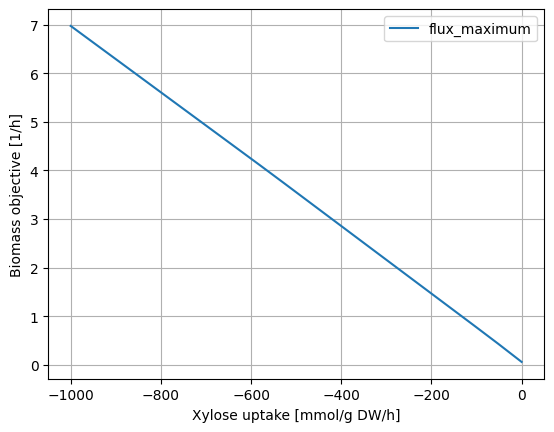

In [32]:
ppp_biomass_xyl_no_oxy.plot(x='EX_xyl__D_e', y='flux_maximum', xlabel="Xylose uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]", grid = True)

In [33]:
ppp_EPA_xyl_no_oxy = production_envelope(model,
                    reactions=[xyl_exchange],
                    objective=model.reactions.DM_Eicosapentaenoic_Acid)
ppp_EPA_xyl_no_oxy

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_xyl__D_e
0,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,0.0,0.111111,0.000444,0.000223,-1000.000000
1,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,0.0,0.111111,0.000469,0.000235,-947.368421
2,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,0.0,0.111111,0.000496,0.000249,-894.736842
3,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,0.0,0.111111,0.000527,0.000265,-842.105263
4,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,0.0,0.111111,0.000562,0.000282,-789.473684
5,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,0.0,0.111111,0.000602,0.000302,-736.842105
6,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,0.0,0.111111,0.000648,0.000325,-684.210526
7,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,0.0,0.111111,0.000702,0.000353,-631.578947
8,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,0.0,0.111111,0.000766,0.000385,-578.947368
9,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,0.0,0.111111,0.000843,0.000423,-526.315789


<Axes: xlabel='Xylose uptake [mmol/g DW/h]', ylabel='EPA objective [1/h]'>

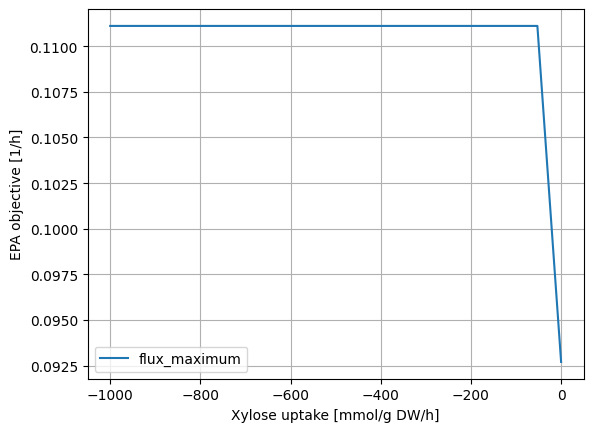

In [34]:
ppp_EPA_xyl_no_oxy.plot(x='EX_xyl__D_e', y='flux_maximum', xlabel="Xylose uptake [mmol/g DW/h]", ylabel="EPA objective [1/h]", grid = True)

In [35]:
medium['EX_xyl__D_e'] = 700
model.reactions.EX_glyc_e.bounds = -1, 0
model.reactions.EX_xyl__D_e.bounds = -1, 0
model.reactions.EX_glc__D_e.bounds = -1000,0
model.reactions.EX_o2_e.bounds = -1,0
model.medium

{'EX_nh4_e': 999999.0,
 'EX_o2_e': 1,
 'EX_pi_e': 999999.0,
 'EX_so4_e': 999999.0,
 'EX_xyl__D_e': 1,
 'EX_glyc_e': 1,
 'EX_glc__D_e': 1000,
 'EX_h2o_e': 999999.0}

In [36]:
ppp_biomass_glc_no_oxy = production_envelope(model,
                    reactions=[glc_exchange],
                    objective=growth)
ppp_biomass_glc_no_oxy

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e
0,EX_glc__D_e,0.0,0.0,NaN,17.940438,1.879815,NaN,-1000.000000
1,EX_glc__D_e,0.0,0.0,NaN,17.940438,1.984249,NaN,-947.368421
2,EX_glc__D_e,0.0,0.0,NaN,17.940438,2.100969,NaN,-894.736842
3,EX_glc__D_e,0.0,0.0,NaN,17.372462,2.161608,NaN,-842.105263
4,EX_glc__D_e,0.0,0.0,NaN,16.295423,2.162768,NaN,-789.473684
5,EX_glc__D_e,0.0,0.0,NaN,15.218384,2.164094,NaN,-736.842105
6,EX_glc__D_e,0.0,0.0,NaN,14.141345,2.165623,NaN,-684.210526
7,EX_glc__D_e,0.0,0.0,NaN,13.064305,2.167408,NaN,-631.578947
8,EX_glc__D_e,0.0,0.0,NaN,11.987266,2.169517,NaN,-578.947368
9,EX_glc__D_e,0.0,0.0,NaN,10.910227,2.172048,NaN,-526.315789


<Axes: xlabel='Xylose uptake [mmol/g DW/h]', ylabel='Biomass objective [1/h]'>

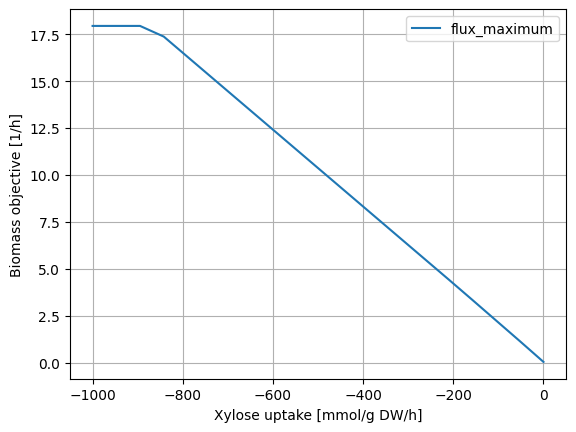

In [37]:
ppp_biomass_glc_no_oxy.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Xylose uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]", grid = True)

In [38]:
ppp_EPA_glc_no_oxy = production_envelope(model,
                    reactions=[glc_exchange],
                    objective=model.reactions.DM_Eicosapentaenoic_Acid)
ppp_EPA_glc_no_oxy

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e
0,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,0.0,0.111111,0.000370,0.000186,-1000.000000
1,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,0.0,0.111111,0.000391,0.000196,-947.368421
2,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,0.0,0.111111,0.000414,0.000208,-894.736842
3,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,0.0,0.111111,0.000439,0.000221,-842.105263
4,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,0.0,0.111111,0.000469,0.000235,-789.473684
5,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,0.0,0.111111,0.000502,0.000252,-736.842105
6,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,0.0,0.111111,0.000541,0.000271,-684.210526
7,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,0.0,0.111111,0.000586,0.000294,-631.578947
8,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,0.0,0.111111,0.000639,0.000321,-578.947368
9,"EX_xyl__D_e, EX_glc__D_e",0.0,0.0,0.0,0.111111,0.000703,0.000353,-526.315789


<Axes: xlabel='Xylose uptake [mmol/g DW/h]', ylabel='EPA objective [1/h]'>

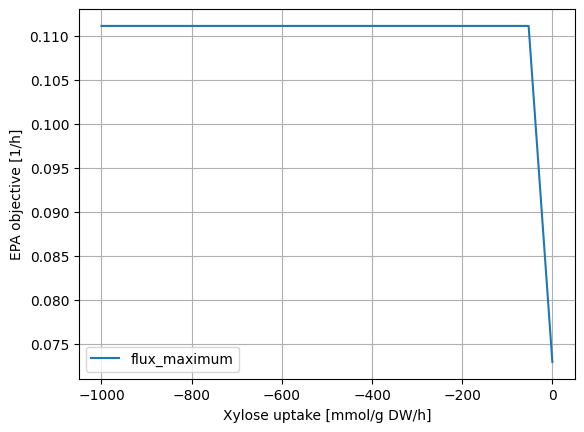

In [39]:
ppp_EPA_glc_no_oxy.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Xylose uptake [mmol/g DW/h]", ylabel="EPA objective [1/h]", grid = True)

<Axes: title={'center': 'EPA production on glucose no oxygen '}, xlabel='Glucose uptake [mmol/g DW/h]', ylabel='EPA objective [1/h]'>

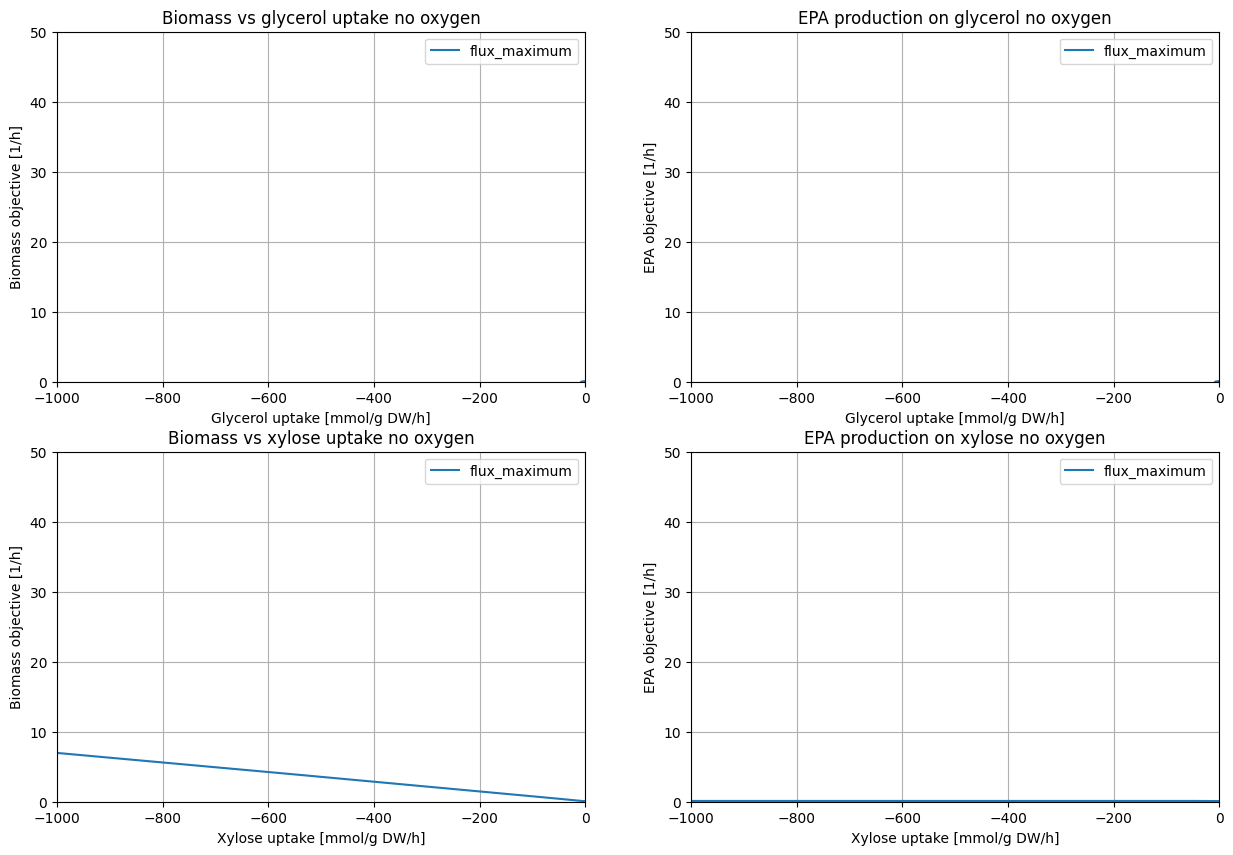

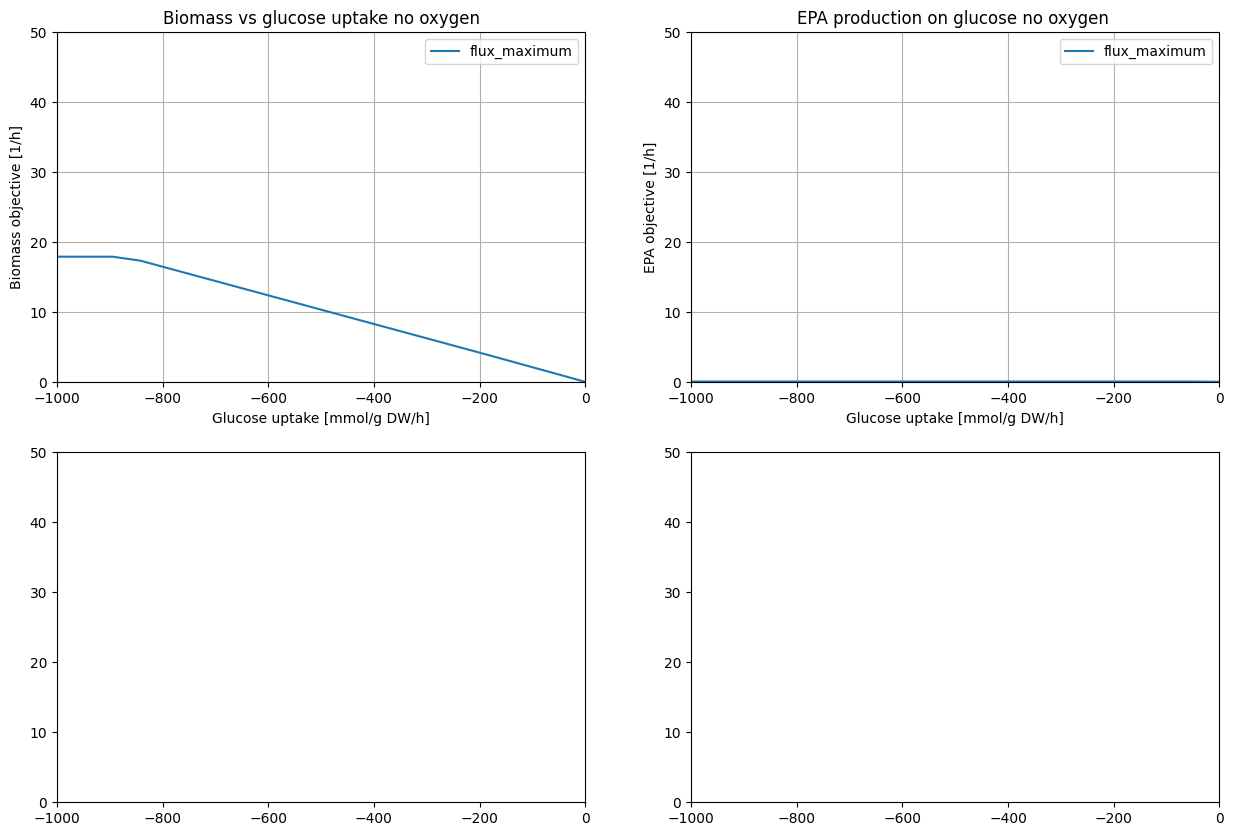

In [40]:
#All plots together. 
fig,axs = plt.subplots(2,2,figsize=(15,10),subplot_kw={'xlim':(-1000,0),'ylim':(0,50)})

ppp_biomass_no_oxy.plot(x='EX_glyc_e', y='flux_maximum', xlabel="Glycerol uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]", grid = True, ax=axs[0][0], title="Biomass vs glycerol uptake no oxygen")

ppp_EPA_glyc_no_oxy.plot(x='EX_glyc_e', y='flux_maximum', xlabel="Glycerol uptake [mmol/g DW/h]", ylabel="EPA objective [1/h]", grid = True, ax=axs[0][1], title="EPA production on glycerol no oxygen")
                        
ppp_biomass_xyl_no_oxy.plot(x='EX_xyl__D_e', y='flux_maximum', xlabel="Xylose uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]", grid = True, ax=axs[1][0], title="Biomass vs xylose uptake no oxygen")

ppp_EPA_xyl_no_oxy.plot(x='EX_xyl__D_e', y='flux_maximum', xlabel="Xylose uptake [mmol/g DW/h]", ylabel="EPA objective [1/h]", grid = True, ax=axs[1][1], title="EPA production on xylose no oxygen")

fig,axs = plt.subplots(2,2,figsize=(15,10),subplot_kw={'xlim':(-1000,0),'ylim':(0,50)})

ppp_biomass_glc_no_oxy.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]", grid = True, ax=axs[0][0], title="Biomass vs glucose uptake no oxygen")

ppp_EPA_glc_no_oxy.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", ylabel="EPA objective [1/h]", grid = True, ax=axs[0][1], title="EPA production on glucose no oxygen ")

